In [3]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

> In this competition you are predicting the probability that an online transaction is fraudulent, as denoted by the binary target isFraud.

El target es predecir si la transaccion es fraudulenta o no

In [5]:
train_identity = pd.read_csv('./ieee-fraud-detection/train_identity.csv')

train_transaction = pd.read_csv('./ieee-fraud-detection/train_transaction.csv',
                                usecols=['TransactionID','isFraud'])

In [3]:
display(train_identity)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.00,"70,787.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.00,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.00,"98,945.00",NaN,NaN,0.00,-5.00,NaN,NaN,NaN,...,mobile safari 11.0,32.00,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.00,"191,631.00",0.00,0.00,0.00,0.00,NaN,NaN,0.00,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.00,"221,832.00",NaN,NaN,0.00,-6.00,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.00,"7,460.00",0.00,0.00,1.00,0.00,NaN,NaN,0.00,...,chrome 62.0,24.00,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.00,"145,955.00",0.00,0.00,0.00,0.00,NaN,NaN,0.00,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.00,"172,059.00",NaN,NaN,1.00,-5.00,NaN,NaN,NaN,...,chrome 55.0 for android,32.00,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.00,"632,381.00",NaN,NaN,-1.00,-36.00,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.00,"55,528.00",0.00,0.00,0.00,-7.00,NaN,NaN,0.00,...,chrome 66.0,24.00,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [4]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

# Le agrego el target a cada transaction ID

Agrego a cada transaccion si fue fraudulenta y determino que correlaciones existen entre los targets y los labels disponibles

In [6]:
train_identity_with_target = train_identity.merge(train_transaction, how='left', on='TransactionID')

In [6]:
train_identity_with_target.corr()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32,isFraud
TransactionID,1.00,-0.09,0.17,-0.02,-0.00,-0.06,-0.03,-0.12,0.04,-0.03,...,0.11,-0.02,0.08,-0.03,0.05,-0.04,0.02,0.01,-0.07,0.09
id_01,-0.09,1.00,-0.14,0.02,0.04,0.01,0.20,0.11,0.10,0.03,...,-0.02,0.00,-0.07,-0.17,0.01,-0.13,-0.04,-0.07,-0.00,-0.12
id_02,0.17,-0.14,1.00,-0.02,0.00,-0.10,-0.05,-0.00,0.01,-0.02,...,0.14,-0.09,0.11,-0.01,0.19,0.04,0.02,0.07,0.13,0.05
id_03,-0.02,0.02,-0.02,1.00,0.34,0.03,0.06,0.02,0.06,0.71,...,0.01,-0.01,0.00,0.07,0.07,-0.02,-0.02,0.03,-0.01,0.04
id_04,-0.00,0.04,0.00,0.34,1.00,-0.03,0.08,0.04,0.05,0.25,...,0.02,0.02,-0.01,0.01,0.00,-0.07,-0.08,-0.04,0.02,-0.06
id_05,-0.06,0.01,-0.10,0.03,-0.03,1.00,-0.29,0.22,0.01,0.09,...,-0.14,-0.02,-0.06,-0.10,-0.13,-0.01,-0.06,-0.03,0.10,-0.01
id_06,-0.03,0.20,-0.05,0.06,0.08,-0.29,1.00,-0.03,0.33,0.08,...,0.05,0.03,-0.07,0.12,0.13,0.08,-0.05,0.09,-0.09,-0.03
id_07,-0.12,0.11,-0.00,0.02,0.04,0.22,-0.03,1.00,-0.09,0.08,...,-0.16,-0.05,-0.07,-0.19,-0.28,-0.07,0.04,-0.13,0.23,-0.08
id_08,0.04,0.10,0.01,0.06,0.05,0.01,0.33,-0.09,1.00,0.11,...,-0.06,0.05,-0.00,0.09,0.14,-0.01,-0.00,0.04,-0.02,-0.06
id_09,-0.03,0.03,-0.02,0.71,0.25,0.09,0.08,0.08,0.11,1.00,...,-0.02,-0.01,-0.01,0.04,0.03,-0.01,0.00,-0.05,-0.03,0.03


In [7]:
train_identity_with_target.corr().iloc[1:-1].isFraud

id_01                  -0.12
id_02                   0.05
id_03                   0.04
id_04                  -0.06
id_05                  -0.01
id_06                  -0.03
id_07                  -0.08
id_08                  -0.06
id_09                   0.03
id_10                   0.01
id_11                   0.01
id_13                  -0.02
id_14                   0.06
id_17                   0.15
id_18                   0.05
id_19                  -0.04
id_20                   0.06
id_21                   0.06
id_22                   0.12
id_24                  -0.00
id_25                   0.03
id_26                   0.10
id_32                   0.07
Name: isFraud, dtype: float64

# Busco correlaciones entre los labels

<AxesSubplot:>

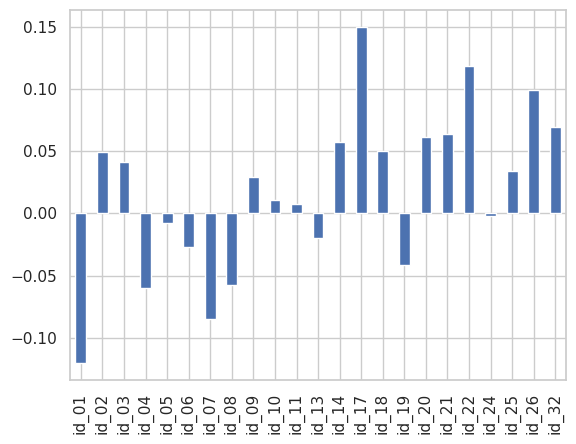

In [8]:
train_identity_with_target.corr().iloc[1:-1].isFraud.plot.bar()

<AxesSubplot:title={'center':'id_17'}, xlabel='isFraud'>

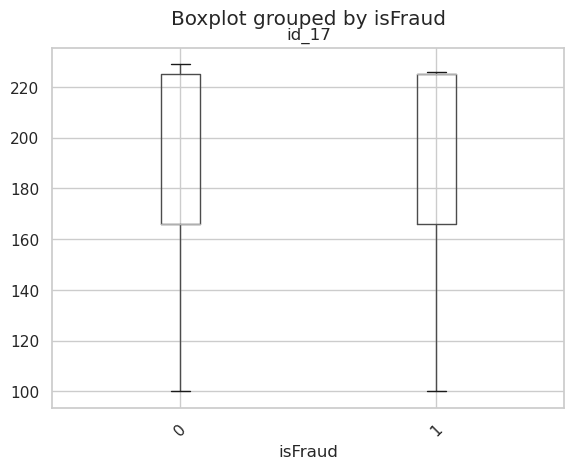

In [19]:
train_identity_with_target.boxplot('id_17','isFraud',meanline=True, rot=45)

Text(0, 0.5, 'Cantidad id_22')

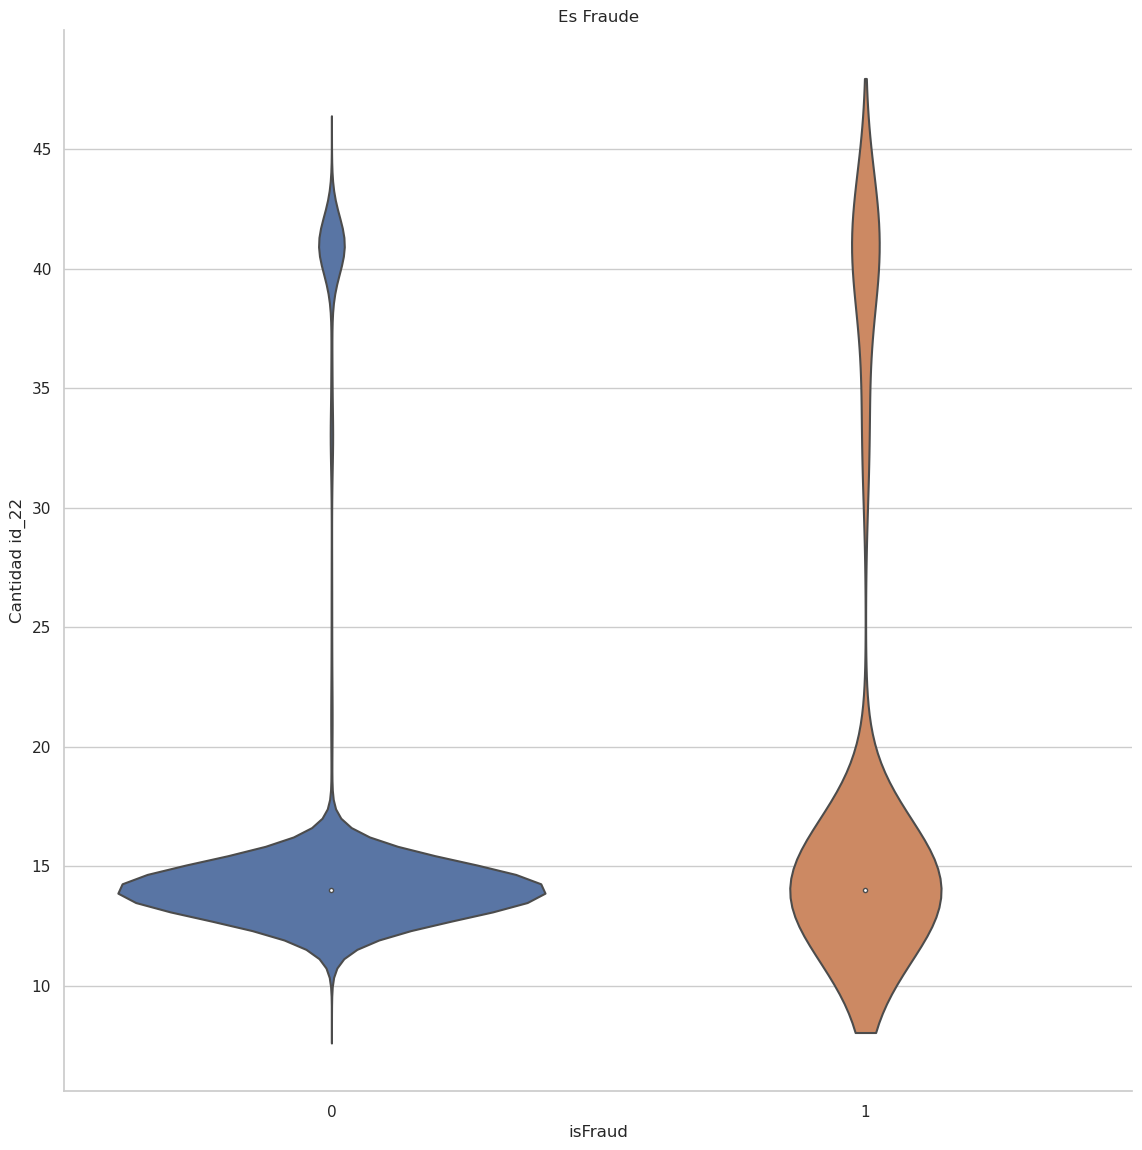

In [18]:
cm = 1/2.54
fig, ax = plt.subplots(1,1, figsize=(35*cm, 35*cm))


sns.violinplot('isFraud','id_22', data=train_identity_with_target, ax=ax)
sns.despine()

ax.set_title("Es Fraude")
ax.set_ylabel("Cantidad id_22")

In [51]:
train_identity_with_target.corr().iloc[1:-1].isFraud

id_01                  -0.12
id_02                   0.05
id_03                   0.04
id_04                  -0.06
id_05                  -0.01
id_06                  -0.03
id_07                  -0.08
id_08                  -0.06
id_09                   0.03
id_10                   0.01
id_11                   0.01
id_13                  -0.02
id_14                   0.06
id_17                   0.15
id_18                   0.05
id_19                  -0.04
id_20                   0.06
id_21                   0.06
id_22                   0.12
id_24                  -0.00
id_25                   0.03
id_26                   0.10
id_32                   0.07
Name: isFraud, dtype: float64

Text(45.046875, 0.5, 'id')

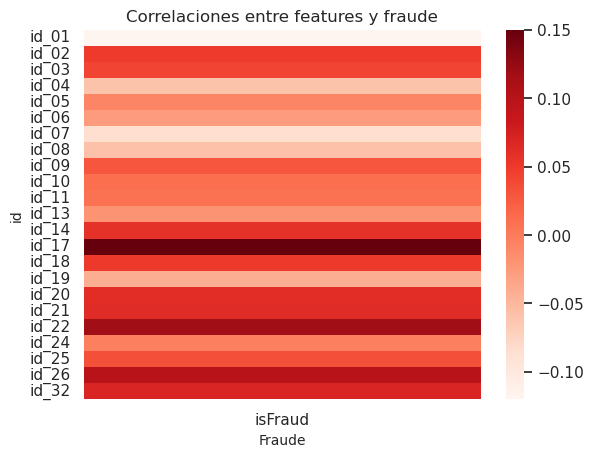

In [63]:
heat_map_db = train_identity_with_target.corr().iloc[1:-1].isFraud.to_frame()

ax = sns.heatmap(heat_map_db, cmap ='Reds')
ax.set_title('Correlaciones entre features y fraude')
ax.set_xlabel ('Fraude', fontsize = 10)
ax.set_ylabel ('id', fontsize = 10)

# Data Adicional

Vemos los valores que se repiten mas por categoria para los registros.

array([[<AxesSubplot:title={'center':'TransactionID'}>,
        <AxesSubplot:title={'center':'id_01'}>,
        <AxesSubplot:title={'center':'id_02'}>,
        <AxesSubplot:title={'center':'id_03'}>,
        <AxesSubplot:title={'center':'id_04'}>],
       [<AxesSubplot:title={'center':'id_05'}>,
        <AxesSubplot:title={'center':'id_06'}>,
        <AxesSubplot:title={'center':'id_07'}>,
        <AxesSubplot:title={'center':'id_08'}>,
        <AxesSubplot:title={'center':'id_09'}>],
       [<AxesSubplot:title={'center':'id_10'}>,
        <AxesSubplot:title={'center':'id_11'}>,
        <AxesSubplot:title={'center':'id_13'}>,
        <AxesSubplot:title={'center':'id_14'}>,
        <AxesSubplot:title={'center':'id_17'}>],
       [<AxesSubplot:title={'center':'id_18'}>,
        <AxesSubplot:title={'center':'id_19'}>,
        <AxesSubplot:title={'center':'id_20'}>,
        <AxesSubplot:title={'center':'id_21'}>,
        <AxesSubplot:title={'center':'id_22'}>],
       [<AxesSubplot:title={

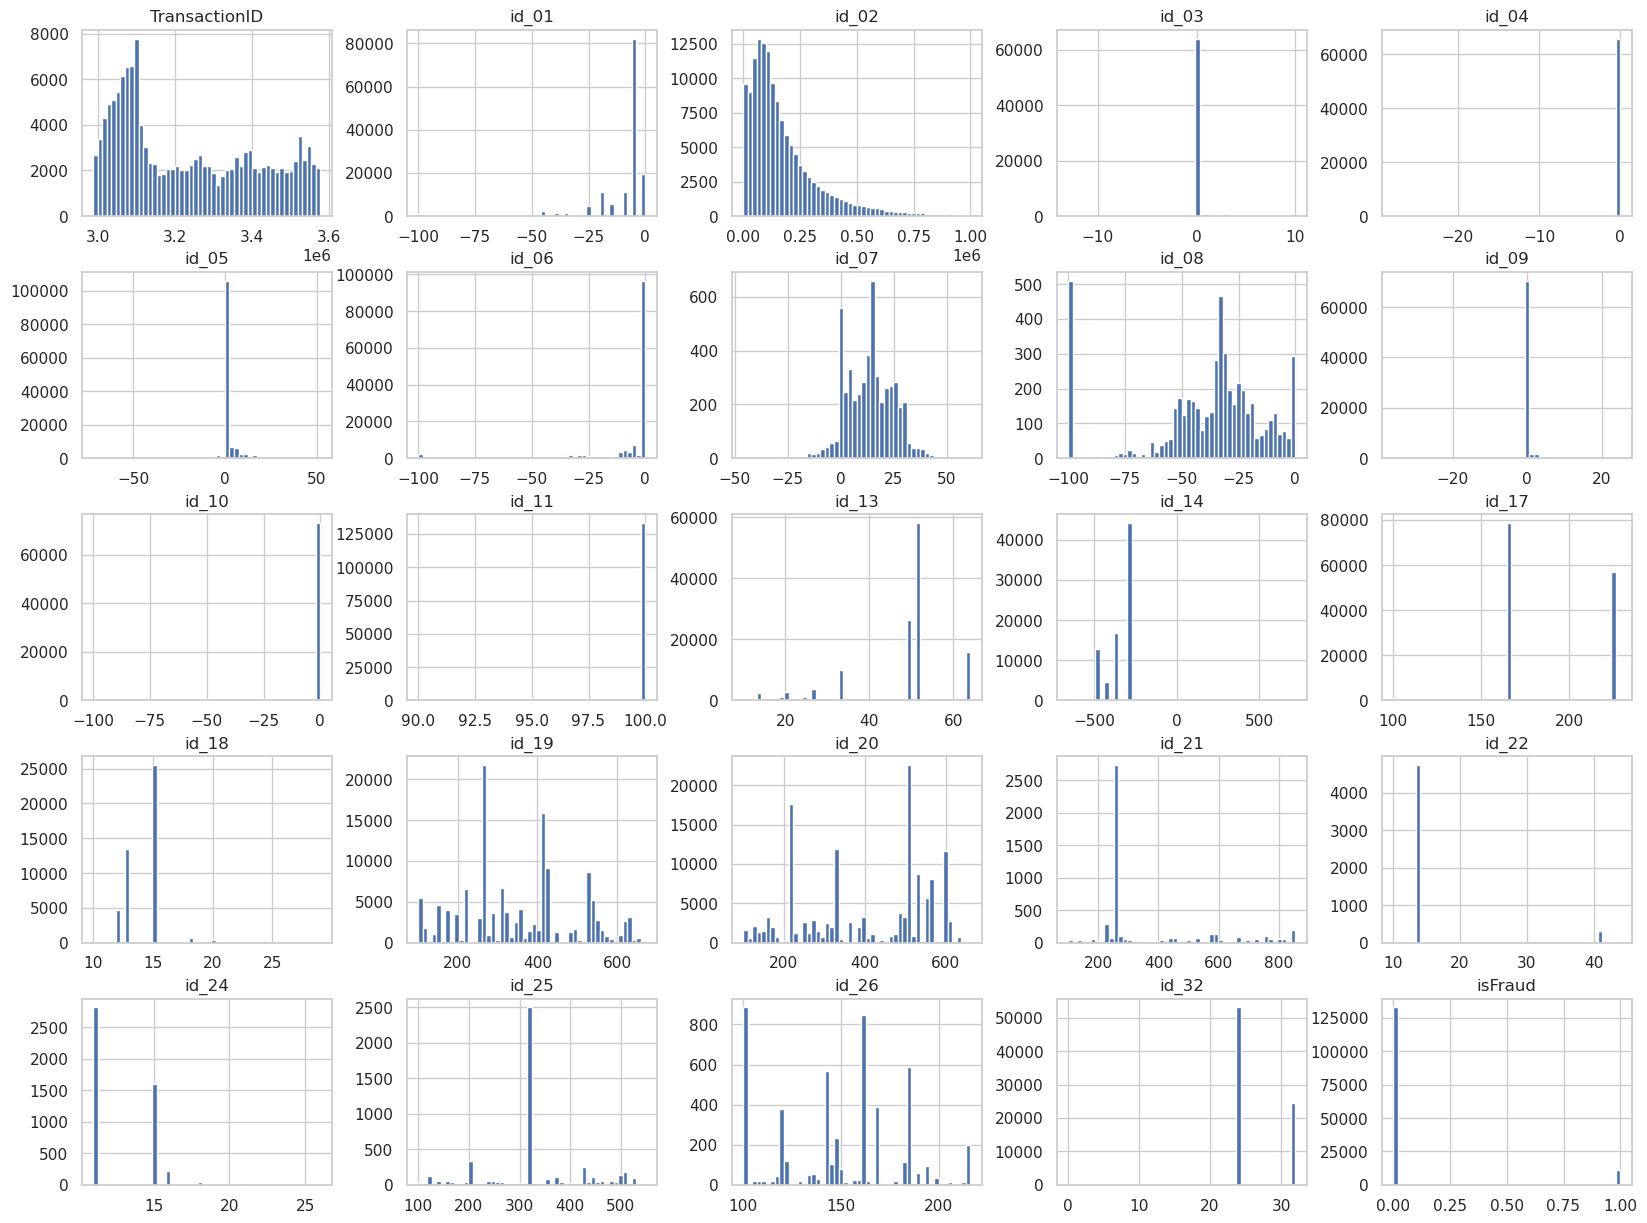

In [22]:
train_identity_with_target.hist(bins=50, figsize=(20,15))

A partir de esta distribucion de datos hago un analisis un poco mas profundo en 

In [7]:
train_identity_with_target.sample(10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
78868,3237351,-5.00,"95,600.00",NaN,NaN,3.00,-27.00,NaN,NaN,NaN,...,NaN,NaN,NaN,F,F,T,F,mobile,NaN,0
64128,3150139,0.00,"307,944.00",0.00,0.00,-6.00,-24.00,NaN,NaN,0.00,...,NaN,NaN,NaN,F,F,T,T,mobile,LT22i Build/6.2.A.1.100,1
127366,3500501,-5.00,"103,946.00",NaN,NaN,0.00,-5.00,NaN,NaN,NaN,...,24.00,1920x1080,match_status:2,T,F,T,F,desktop,Windows,0
115080,3430066,-5.00,"74,149.00",NaN,NaN,11.00,-7.00,NaN,NaN,0.00,...,24.00,1920x1080,match_status:2,T,F,T,T,desktop,Windows,0
111860,3411089,-5.00,"179,651.00",0.00,0.00,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,F,F,T,F,desktop,rv:59.0,0
29739,3065456,0.00,"53,168.00",NaN,NaN,0.00,0.00,NaN,NaN,NaN,...,24.00,2560x1600,match_status:2,T,F,T,T,desktop,MacOS,0
17980,3040698,-20.00,"67,030.00",NaN,NaN,0.00,-5.00,NaN,NaN,NaN,...,24.00,1366x768,match_status:2,T,F,F,T,desktop,NaN,1
28992,3064072,-5.00,"126,935.00",NaN,NaN,2.00,-5.00,NaN,NaN,0.00,...,NaN,NaN,NaN,F,F,T,T,desktop,rv:11.0,0
127233,3499665,-5.00,"126,621.00",NaN,NaN,0.00,-5.00,NaN,NaN,0.00,...,NaN,NaN,NaN,F,F,T,T,desktop,rv:11.0,1
125656,3489832,-10.00,"762,972.00",0.00,0.00,0.00,0.00,NaN,NaN,0.00,...,NaN,NaN,NaN,F,F,T,F,mobile,es-us,0


In [9]:
train_identity_with_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 42 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
train_identity_with_target